In [8]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load dataset final
print("1. Memuat dataset lengkap...")
try:
    df = pd.read_csv('../data/dataset_final.csv')
    # Menghapus baris dimana kolom 'Teks' kosong, untuk jaga-jaga
    df.dropna(subset=['Clean Narasi'], inplace=True)
    print(f"Berhasil! Total {len(df)} baris data dimuat.")
except FileNotFoundError:
    print("GAGAL! File 'dataset_final.csv' tidak ditemukan. Pastikan file ada di folder 'data/'.")
    exit()

1. Memuat dataset lengkap...
Berhasil! Total 24592 baris data dimuat.


In [10]:
# Pembagian data
print("\n2. Membagi data menjadi 80% Latih dan 20% Uji...")

# Menentukan variabel fitur (X) dan variabel target (y)
X = df['Clean Narasi']
y = df['hoax']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    # 20% data untuk pengujian
    random_state=42, 
    stratify=y        
)

print(f"Berhasil! Ukuran data latih: {len(X_train)} baris, Ukuran data uji: {len(X_test)} baris.")


2. Membagi data menjadi 80% Latih dan 20% Uji...
Berhasil! Ukuran data latih: 19673 baris, Ukuran data uji: 4919 baris.


In [11]:
# Ekstraksi fitur TF-IDF
print("\n3. Mengubah teks menjadi vektor angka dengan TF-IDF...")

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Ambil 5000 kata

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Teks berhasil diubah menjadi vektor TF-IDF.")


3. Mengubah teks menjadi vektor angka dengan TF-IDF...
Teks berhasil diubah menjadi vektor TF-IDF.


In [12]:
# Melatih model
print("\n4. Melatih model Machine Learning (Multinomial Naive Bayes)...")

# Inisialisasi model
model = MultinomialNB()

# Latih model dengan data latih
model.fit(X_train_tfidf, y_train)

print("Model berhasil dilatih!")


4. Melatih model Machine Learning (Multinomial Naive Bayes)...
Model berhasil dilatih!



5. Mengevaluasi performa model pada data uji...

Akurasi Model: 95.65%

Laporan Klasifikasi:
              precision    recall  f1-score   support

   Fakta (0)       0.93      0.99      0.96      2529
   Hoaks (1)       0.99      0.92      0.95      2390

    accuracy                           0.96      4919
   macro avg       0.96      0.96      0.96      4919
weighted avg       0.96      0.96      0.96      4919


Confusion Matrix:


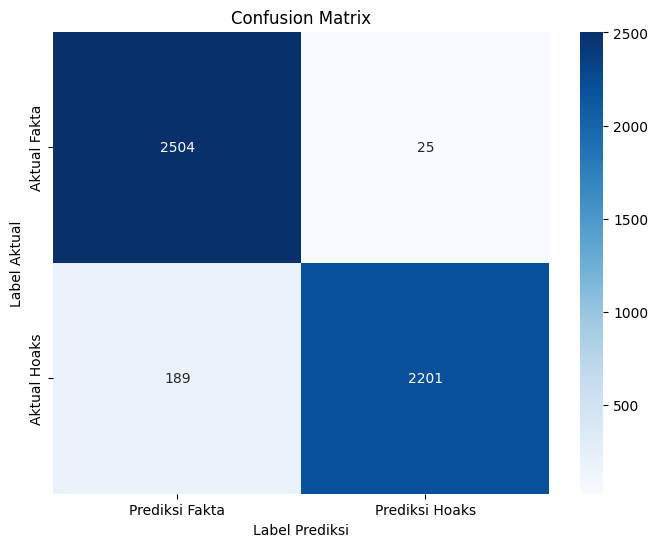

In [14]:
# Evaluasi
print("\n5. Mengevaluasi performa model pada data uji...")

# Membuat prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# Menampilkan Precision, Recall, F1-Score
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Fakta (0)', 'Hoaks (1)']))

# Menampilkan Confusion Matrix 
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prediksi Fakta', 'Prediksi Hoaks'], 
            yticklabels=['Aktual Fakta', 'Aktual Hoaks'])
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()